In [1]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D


In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
from tensorflow.keras.utils import to_categorical

In [9]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

In [16]:
print(x_test.shape)


(10000, 32, 32, 3)


In [17]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.3,batch_size=32)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 61s 56ms/step - accuracy: 0.8771 - loss: 0.3503 - val_accuracy: 0.6863 - val_loss: 1.1085
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8931 - loss: 0.3057 - val_accuracy: 0.6873 - val_loss: 1.1471
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9128 - loss: 0.2523 - val_accuracy: 0.6730 - val_loss: 1.3489
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.9268 - loss: 0.2105 - val_accuracy: 0.6727 - val_loss: 1.3978
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 86s 56ms/step - accuracy: 0.9364 - loss: 0.1821 - val_accuracy: 0.6726 - val_loss: 1.5620
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.9460 - loss: 0.1586 - val_accuracy: 0.6695 - val_loss: 1.6085
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9494 - loss: 0.1466 - val_accuracy: 0.6823 - val_loss: 1.7492
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 61s 55ms/step - accuracy: 0.9557 -

In [23]:
loss,acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6763 - loss: 1.9921


In [24]:
print(loss,acc)

2.0153417587280273 0.6715999841690063


In [26]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [28]:
model.save('model.h5')

In [29]:
import matplotlib.pyplot as plt

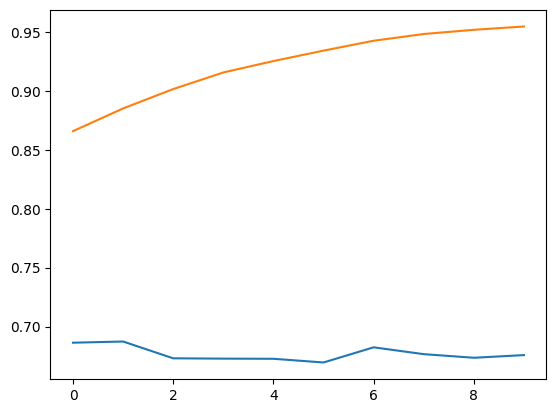

In [32]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.show()

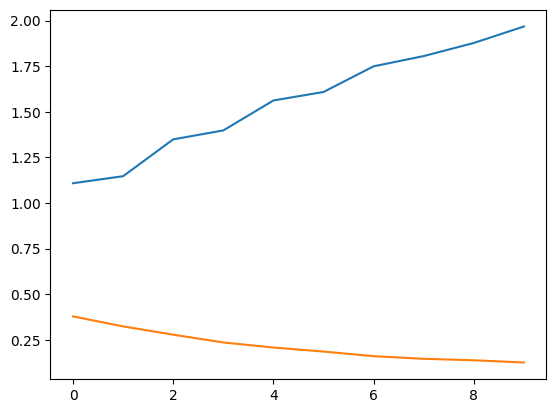

In [34]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()